In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as math
import scipy as sci

In [3]:
df = pd.read_csv(r'C:\Users\Cheng Qiu\Documents\Python Scripts\Data Science\DS take home challenge\DataSet\Employee Retention\employee_retention_data.csv')


In [4]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [5]:
df.describe()

##noticed there is possible outlier (data entry erroe in seniority)

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [11]:
#take out those outliers 
df=df[df['seniority']<=40]

In [15]:
#change date columns to date time format
df['join_date'],df['quit_date']=pd.to_datetime(df['join_date'],errors='ignore'),pd.to_datetime(df['quit_date'],errors='ignore')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24700 entries, 0 to 24699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24700 non-null  float64       
 1   company_id   24700 non-null  int64         
 2   dept         24700 non-null  object        
 3   seniority    24700 non-null  int64         
 4   salary       24700 non-null  float64       
 5   join_date    24700 non-null  datetime64[ns]
 6   quit_date    13508 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.5+ MB


In [17]:
#copied code from online to create this table 

unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(df['company_id'].unique())

day = []
company = []
headcount = []

# Loop through date and company id
for date in unique_date:
    for idx in unique_company:
        total_join = len(df[(df['join_date'] <= date) & (df['company_id'] == idx)])
        total_quit = len(df[(df['quit_date'] <= date) & (df['company_id'] == idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join - total_quit)

# Create table for day, employee_headcount, company_id
table = pd.DataFrame({'day': day, 'company_id': company, 'employee_headcount': headcount}, 
                     columns=['day', 'company_id', 'employee_headcount'])

In [28]:
table.head(5)

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


<Figure size 1008x360 with 0 Axes>

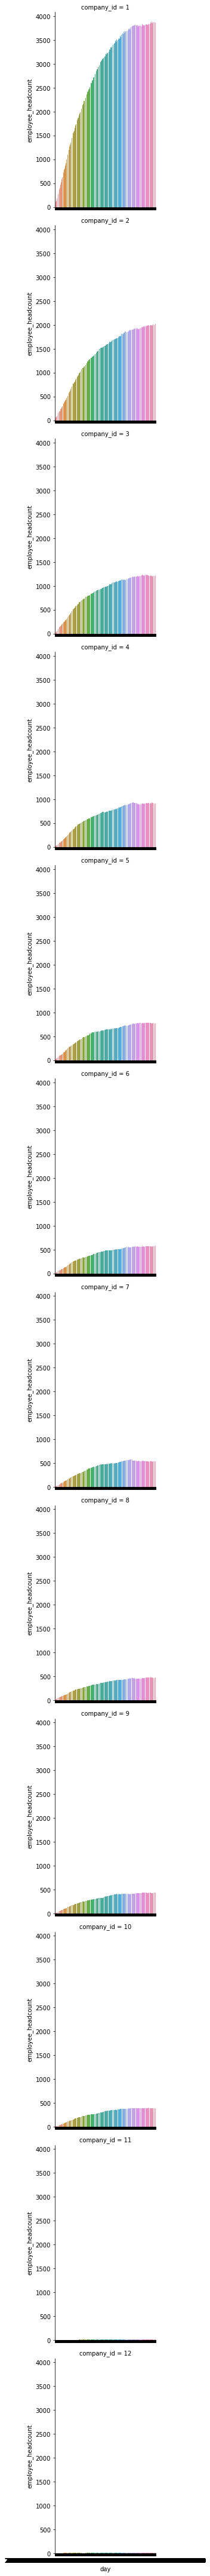

In [27]:
plt.figure(figsize=(14,5))

sns.catplot(x = 'day', y = 'employee_headcount', row="company_id", data = table, kind ='bar')

In [30]:
df[df['company_id']==11]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
248,425545.0,11,engineer,26,203000.0,2013-09-12,2014-07-18
389,952116.0,11,engineer,18,177000.0,2013-02-05,2014-02-21
742,377606.0,11,customer_service,20,83000.0,2014-05-05,NaT
1836,296591.0,11,data_science,8,115000.0,2011-02-22,2013-06-21
2503,692121.0,11,marketing,23,135000.0,2012-03-26,2014-08-08
4889,1012.0,11,data_science,25,192000.0,2013-02-25,2014-08-15
5029,131817.0,11,customer_service,3,21000.0,2014-06-16,2015-05-08
6781,74684.0,11,engineer,2,45000.0,2012-08-13,NaT
9824,814745.0,11,marketing,23,114000.0,2011-12-27,2014-03-28
12367,787003.0,11,engineer,19,210000.0,2012-04-11,2015-02-06
